Machine learing :
- classic
- deep learning

classic : 
- supervised
- unsurpervised
- reinforcement learning (algo pour go, battre au echec etc) [encore en fase de recherche]

Reinforcement learning :
- energie
- finances 
- généritque

Supervised :
- Pour tout
- Features
- Variable cible
- Data labélisé

Unsupervised :
- Pour tout
- Features
- Pas de variable cible

- utilisation :
    - Data visualization
    - Clustering
    - Dimentionality reduction (peut être utiliser pour ensuite améliorer le Supervise)

# Importer les données et data vizualisation

In [281]:
import seaborn as sns;
import pandas as pd;
import numpy as np;

sns.set

# charger le dataset
iris = sns.load_dataset('iris')

In [282]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [283]:
type(iris)

pandas.core.frame.DataFrame

In [284]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [285]:
iris['species'].nunique()

3

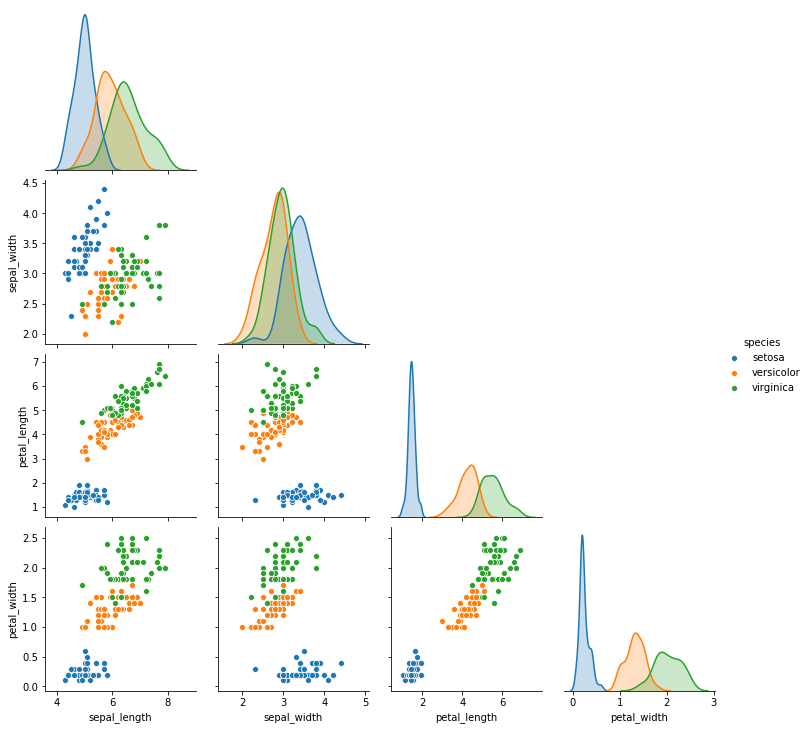

In [286]:
#sns.pairplot(iris, hue="species", diag_kind='hist', corner=True) 
sns.pairplot(iris, hue="species", diag_kind='kde', corner=True) #kde = kernel dimention estimation
#corner=true permet de supprimer tout ce qu'il y a sur la diagonal supérieur

## Séparer les features de la target

In [287]:
#target
Y = iris['species'].astype('category').cat.codes

In [288]:
vocabulaire = iris['species'].astype('category').cat.categories

In [289]:
vocabulaire

Index(['setosa', 'versicolor', 'virginica'], dtype='object')

In [290]:
#Obtenir un truc qui permet de passer
# 1) de classes vers nombres
# 2) de nombres vers classes

classe2index = {v:i for i, v in enumerate(vocabulaire.tolist())} #On transforme les string en valeur ordinal (soit 0, 1, 2 etc.)
index2classe = {i:v for i, v in enumerate(vocabulaire.tolist())}

#import pickle (permet de sauvegarder les dico)

In [291]:
index2classe

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [292]:
classe2index

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [293]:
Y.map(index2classe)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Length: 150, dtype: object

In [294]:
Y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int8

In [295]:
#target
Y = iris['species'].astype('category').cat.codes
classes = iris['species'].astype('category').cat.categories.tolist()
classes

['setosa', 'versicolor', 'virginica']

In [296]:
classes.index('setosa') #Chercher une valeur dans la list par index
classes[2] #On par sa place dans la liste

'virginica'

In [297]:
# isoler nos features
X = iris.drop('species', axis='columns') #On enleve la colonne species

In [298]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [299]:
X.shape, Y.shape #Shape correspond auX dimensionS ligne/colonne

((150, 4), (150,))

## Entraîner un MODEL

In [300]:
from sklearn.neighbors import KNeighborsClassifier as KNN 

# k-NN ou KNN, de l'anglais k-nearest neighbors.
#
# Pour estimer la sortie associée à une nouvelle entrée x, 
# la méthode des k plus proches voisins consiste à prendre en compte (de façon identique) 
# les k échantillons d'apprentissage dont l’entrée est la plus proche de la nouvelle entrée x,
# selon une distance à définir.

In [301]:
#Résumé du minima syndical

Y = iris['species'].astype('category').cat.codes
X = iris.drop('species', axis='columns') #On enleve la colonne species
X.shape, Y.shape #Shape correspond auX dimensionS ligne/colonne

((150, 4), (150,))

In [329]:
# Créer l'algo
knn = KNN(n_neighbors=3)

In [330]:
print(knn) #Affiche le nombre de voisin que l'on considère

KNeighborsClassifier(n_neighbors=3)


In [331]:
# Entrainer un modèle
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=3)

In [332]:
predictions = knn.predict(X)

In [333]:
predictions

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

In [334]:
# Créer une mesure de performance
def accuracy(preds, target):
    M = target.shape[0] # Nombre d'exemple
    total_correctes = (preds == target).sum()
    accuracy = total_correctes / M
    return accuracy

In [335]:
predictions == Y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [336]:
accuracy(predictions, Y)

0.96

## Tracer les frontières

In [310]:
from sklearn.datasets import make_moons
X, Y = make_moons(random_state=0, noise=0.3)

In [311]:
#X[:5]  #Les 2 points veut dire 'toutes' donc :5 = toutes les 5 premiers lignes
X[:, 0] #Toutes les lignes et colonne = 0

array([ 0.03159499,  2.11509784,  0.88248972, -0.0551441 ,  0.82954503,
        2.11285708,  0.5696927 ,  0.95217454, -0.02922115,  1.71579557,
       -0.27883014,  2.00344509,  1.50009616,  1.22540835,  0.46730819,
       -0.36653222,  0.30124459,  0.30430746, -0.23712492,  1.16339832,
       -0.59702417,  0.46356735,  0.68451111,  0.70515699, -0.65805008,
       -0.74662946,  0.60585226,  2.18137168,  1.91980633,  1.4834364 ,
        0.47404723,  1.05614605,  1.86500732,  0.4194721 ,  0.06873258,
       -0.17332432,  0.12412421,  0.18121142, -0.25451559,  1.02580668,
        1.52002143,  0.64174037, -0.87615589, -1.06964997,  1.02658765,
        0.93131325,  0.67680544, -0.36885733, -1.02465495,  0.77455385,
        1.4045116 , -0.38147174,  0.72155224, -0.51346686,  0.32118546,
        0.1953628 ,  0.52824196, -0.2216539 ,  0.22334676, -0.10704572,
        0.63651685, -0.37227848,  0.20718083,  0.12733142,  0.71435231,
        1.09487814, -0.14814362,  1.586188  ,  0.74444551,  2.18

In [312]:
df_moon = pd.DataFrame({'X0':X[:, 0],
                       'X1':X[:, 1],
                       'Y':Y})
df_moon.head()

,X0,X1,Y
0,0.031595,0.986988,0
1,2.115098,-0.046244,1
2,0.882490,-0.075756,0
3,-0.055144,-0.037332,1
4,0.829545,-0.539321,1


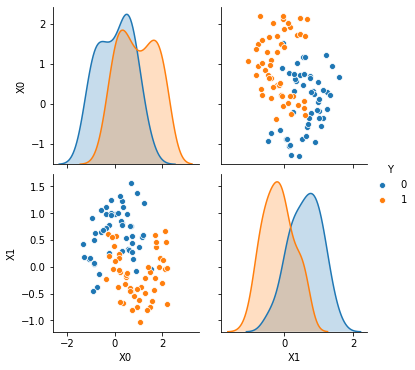

In [313]:
sns.pairplot(df_moon, hue='Y')

In [314]:
# Determiner la plage
def plage_de_valeur(df, col, b=0.2):
    # b est la bordure
    min = df[col].min() - b
    max = df[col].max() + b
    return (min, max)

In [315]:
# Créer les axes
X0_range = np.arange(*plage_de_valeur(df_moon, 'X0'), 0.1) #* veut dire permet de déballer le tuple pour avoir les 3 parametres que demande la méthode
X1_range = np.arange(*plage_de_valeur(df_moon, 'X1'), 0.1)

In [316]:
X0_range

array([-1.51850034, -1.41850034, -1.31850034, -1.21850034, -1.11850034,
       -1.01850034, -0.91850034, -0.81850034, -0.71850034, -0.61850034,
       -0.51850034, -0.41850034, -0.31850034, -0.21850034, -0.11850034,
       -0.01850034,  0.08149966,  0.18149966,  0.28149966,  0.38149966,
        0.48149966,  0.58149966,  0.68149966,  0.78149966,  0.88149966,
        0.98149966,  1.08149966,  1.18149966,  1.28149966,  1.38149966,
        1.48149966,  1.58149966,  1.68149966,  1.78149966,  1.88149966,
        1.98149966,  2.08149966,  2.18149966,  2.28149966])

In [317]:
X1_range

array([-1.23570207, -1.13570207, -1.03570207, -0.93570207, -0.83570207,
       -0.73570207, -0.63570207, -0.53570207, -0.43570207, -0.33570207,
       -0.23570207, -0.13570207, -0.03570207,  0.06429793,  0.16429793,
        0.26429793,  0.36429793,  0.46429793,  0.56429793,  0.66429793,
        0.76429793,  0.86429793,  0.96429793,  1.06429793,  1.16429793,
        1.26429793,  1.36429793,  1.46429793,  1.56429793,  1.66429793,
        1.76429793])

In [318]:
# Créer le maillage
X0_mesh, X1_mesh = np.meshgrid(X0_range, X1_range)

In [319]:
X0_mesh.shape, X1_mesh.shape

((31, 39), (31, 39))

In [320]:
X0_mesh, X1_mesh = X0_mesh.ravel(), X1_mesh.ravel() #ravel veut dire déméler

In [321]:
X0_mesh.shape, X1_mesh.shape

((1209,), (1209,))

In [322]:
mesh_df = pd.DataFrame({"X0": X0_mesh,
                        "X1": X1_mesh})

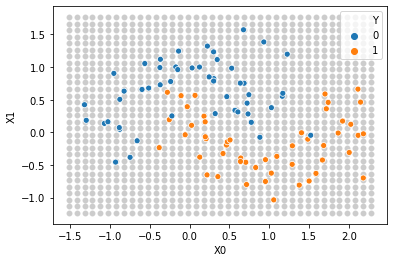

In [323]:
sns.scatterplot(X0_mesh, X1_mesh, color='black', alpha=0.2)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'])

## Avec K=1

In [324]:
knn = KNN(n_neighbors=1)

# entrainer sur moon
knn.fit(X, Y)

KNeighborsClassifier(n_neighbors=1)

In [325]:
mesh_predictions = knn.predict(mesh_df)

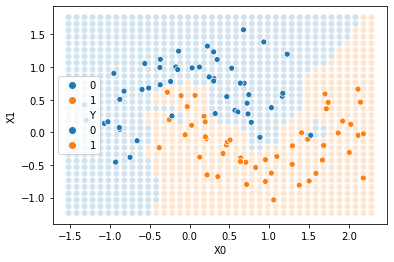

In [326]:
sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.2)
sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'])

## En mode fonction

In [351]:
def plot_knn_decision(K):
    knn = KNN(n_neighbors=K)
    # entrainer sur moon
    knn.fit(X, Y)
    mesh_predictions = knn.predict(mesh_df)
    print('K = ', K)
    sns.scatterplot(X0_mesh, X1_mesh, hue=mesh_predictions, alpha=0.2) # mesh veut dire grille
    sns.scatterplot(df_moon['X0'], df_moon['X1'], hue=df_moon['Y'])
    

K =  1


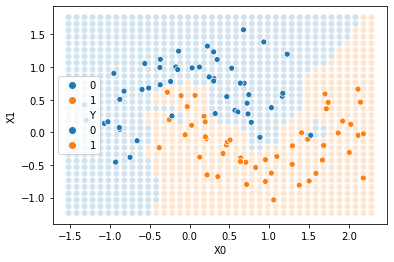

In [352]:
plot_knn_decision(K=1)